In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import utils

In [49]:
height,width=28,28
depth=1
classes=10

model=Sequential()

# CONV => RELU => POOL
model.add(Conv2D(6,kernel_size=5,activation="relu",input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# CONV => RELU => POOL
model.add(Conv2D(16,kernel_size=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# FC => RELU LAYERS
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation="relu"))

# OUTPUT SOFTMAX LAYER
model.add(Dense(classes,activation="softmax"))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
Y_train=utils.to_categorical(y_train,10)
Y_test=utils.to_categorical(y_test,10)

In [51]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
History=model.fit(X_train_new,Y_train,batch_size=128,epochs=10,validation_data=(X_test_new,Y_test))

Epoch 1/10
469/469 [==============================] - 30s 64ms/step - loss: 1.7945 - accuracy: 0.3887 - val_loss: 0.4182 - val_accuracy: 0.8659
Epoch 2/10
469/469 [==============================] - 30s 63ms/step - loss: 0.3394 - accuracy: 0.8978 - val_loss: 0.2206 - val_accuracy: 0.9367
Epoch 3/10
469/469 [==============================] - 30s 63ms/step - loss: 0.2320 - accuracy: 0.9295 - val_loss: 0.2041 - val_accuracy: 0.9377
Epoch 4/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1794 - accuracy: 0.9467 - val_loss: 0.1385 - val_accuracy: 0.9587
Epoch 5/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1505 - accuracy: 0.9545 - val_loss: 0.1141 - val_accuracy: 0.9676
Epoch 6/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.1014 - val_accuracy: 0.9694
Epoch 7/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1128 - accuracy: 0.9657 - val_loss: 0.0972 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

def plt_dynamic(x,vy,ty,ax,colors=['b']):
  ax.plot(x,vy,'b',label="Val Loss")
  ax.plot(x,ty,'r',label="Training Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


0.9750999808311462


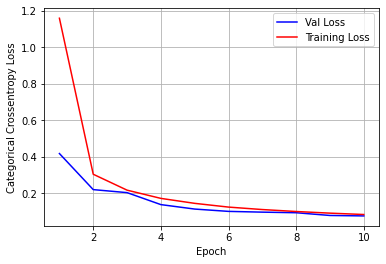

In [53]:
Score=model.evaluate(X_test_new,Y_test,verbose=0)
print(Score[1])

x=list(range(1,11))

fig,ax=plt.subplots(1,1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Categorical Crossentropy Loss")

vy=History.history['val_loss']
ty=History.history['loss']

plt_dynamic(x,vy,ty,ax)
plt.show()

In [42]:
import numpy as np

In [45]:
X_train_new=np.pad(X_train,((0,0),(2,2),(2,2),(0,0)),mode='constant')
X_test_new=np.pad(X_test,((0,0),(2,2),(2,2),(0,0)),mode='constant')